<a href="https://colab.research.google.com/github/vaisshnavee1410/Naive-Bayes-and-Sentiment-Analysis.ipynb/blob/main/Naive_Bayes_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS**

### **DATASET**

The provided dataset, "blogs_categories.csv", consists of blog posts along with their associated categories. Each row represents a blog post with the following columns:

* Text: The content of the blog post. Column name: Data
* Category: The category to which the blog post belongs. Column name: Labels

### **TASKS**

**1. Data Exploration and Preprocessing:**

* **Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
Data      0
Labels    0
dtype: int64
Labels
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.moto

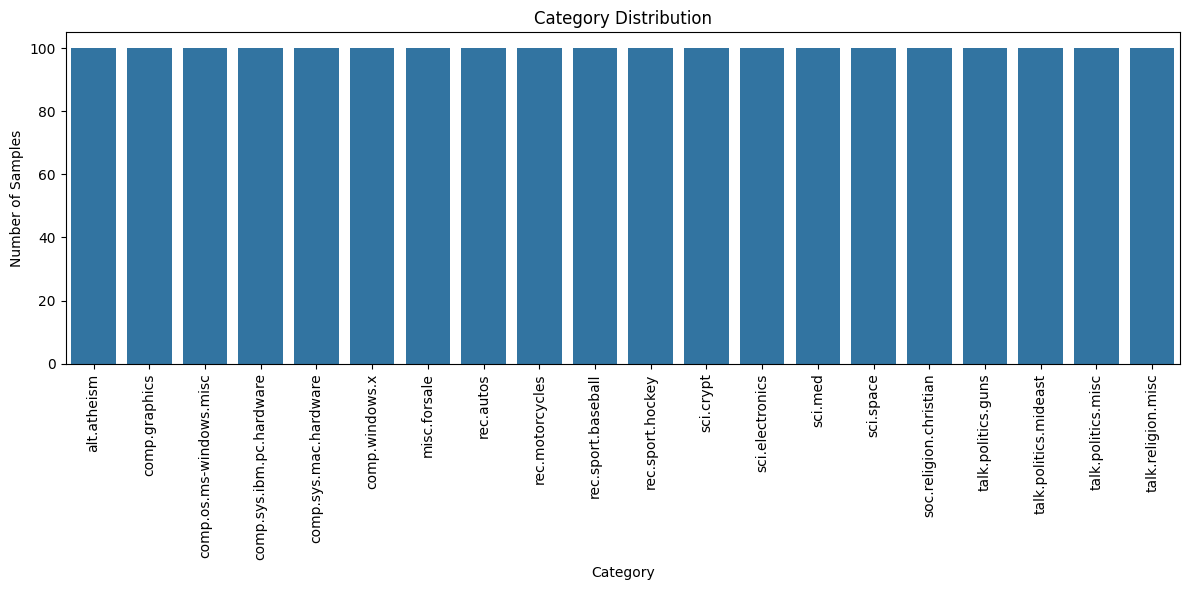

summary statistics
        text_length    word_count
count   2000.000000   2000.000000
mean    2324.978000    314.166000
std     3590.560226    539.210333
min      425.000000     31.000000
25%     1147.000000    127.000000
50%     1605.500000    194.000000
75%     2374.500000    319.000000
max    62290.000000  10384.000000


In [21]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('blogs_categories.csv')

# Basic info
print(data.info())
print(data.head())

# Missing values
print(data.isnull().sum())

import matplotlib.pyplot as plt
import seaborn as sns

# Label frequency
label_counts = data['Labels'].value_counts()
print(label_counts)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xticks(rotation=90)
plt.title("Category Distribution")
plt.ylabel("Number of Samples")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

# Add text length columns
data['text_length'] = data['Data'].apply(len)
data['word_count'] = data['Data'].apply(lambda x: len(x.split()))

# Summary statistics
print("summary statistics")
print(data[['text_length', 'word_count']].describe())


* **Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.**

In [22]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

def clean_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize words
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

# Example usage
sample_text = "Hello! This is an example text, showing how text preprocessing works."
cleaned_tokens = clean_text(sample_text)
print(cleaned_tokens)

['hello', 'example', 'text', 'showing', 'text', 'preprocessing', 'works']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


* **Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.**

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample text data
corpus = [
    "Machine learning is fascinating!",
    "Natural language processing makes AI more powerful.",
    "Text data needs preprocessing before applying ML models."
]

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert to dense format and display
import pandas as pd
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
print(tfidf_df)


         ai  applying    before      data  fascinating   is  language  \
0  0.000000  0.000000  0.000000  0.000000          0.5  0.5  0.000000   
1  0.377964  0.000000  0.000000  0.000000          0.0  0.0  0.377964   
2  0.000000  0.353553  0.353553  0.353553          0.0  0.0  0.000000   

   learning  machine     makes        ml    models      more   natural  \
0       0.5      0.5  0.000000  0.000000  0.000000  0.000000  0.000000   
1       0.0      0.0  0.377964  0.000000  0.000000  0.377964  0.377964   
2       0.0      0.0  0.000000  0.353553  0.353553  0.000000  0.000000   

      needs  powerful  preprocessing  processing      text  
0  0.000000  0.000000       0.000000    0.000000  0.000000  
1  0.000000  0.377964       0.000000    0.377964  0.000000  
2  0.353553  0.000000       0.353553    0.000000  0.353553  


**2. Naive Bayes Model for Text Classification:**

* **Split the data into training and test sets.**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'data' is your DataFrame and 'Data' column contains text
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['Data']) # Create X_tfidf here

# Labels (target)
y = data['Labels']

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

# Display shapes
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (1600, 51404)
Test set shape: (400, 51404)


* **Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.8200

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.84      0.80      0.82        20
           comp.graphics       0.81      0.85      0.83        20
 comp.os.ms-windows.misc       0.85      0.85      0.85        20
comp.sys.ibm.pc.hardware       0.54      0.70      0.61        20
   comp.sys.mac.hardware       0.82      0.70      0.76        20
          comp.windows.x       0.84      0.80      0.82        20
            misc.forsale       0.85      0.85      0.85        20
               rec.autos       0.90      0.90      0.90        20
         rec.motorcycles       0.95      0.90      0.92        20
      rec.sport.baseball       0.87      1.00      0.93        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.90      0.95      0.93        20
         sci.electronics       0.80      0.80      0.80        20
                 sci.med       0.

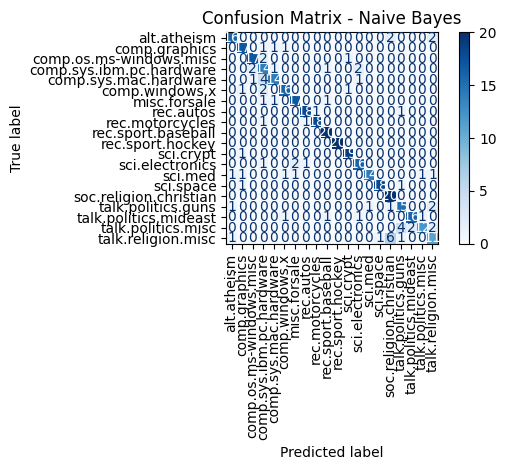

In [25]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Load dataset
df = pd.read_csv('blogs_categories.csv')

# Step 2: Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Step 3: Preprocess text
stop_words = set(stopwords.words('english'))
punctuations = string.punctuation

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', punctuations))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)

df['cleaned_text'] = df['Data'].apply(preprocess_text)

# Step 4: Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text'])
y = df['Labels']

# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 6: Train Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = nb.predict(X_test)

# Step 8: Evaluate model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 9: Visualize confusion matrix
ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test, xticks_rotation=90, cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.tight_layout()
plt.show()

* **Train the model on the training set and make predictions on the test set.**

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Step 2: Train the model on the training data
nb_classifier.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Step 4: Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed performance report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8200

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.84      0.80      0.82        20
           comp.graphics       0.81      0.85      0.83        20
 comp.os.ms-windows.misc       0.85      0.85      0.85        20
comp.sys.ibm.pc.hardware       0.54      0.70      0.61        20
   comp.sys.mac.hardware       0.82      0.70      0.76        20
          comp.windows.x       0.84      0.80      0.82        20
            misc.forsale       0.85      0.85      0.85        20
               rec.autos       0.90      0.90      0.90        20
         rec.motorcycles       0.95      0.90      0.92        20
      rec.sport.baseball       0.87      1.00      0.93        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.90      0.95      0.93        20
         sci.electronics       0.80      0.80      0.80        20
                 sci.med       0.9

**3. Sentiment Analysis:**

* **Choose a suitable library or method for performing sentiment analysis on the blog post texts.**

In [27]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to cleaned text
def get_sentiment_scores(text):
    return sia.polarity_scores(text)

# Apply to the dataset
df['sentiment_scores'] = df['cleaned_text'].apply(get_sentiment_scores)

# Extract compound score and classify sentiment
df['sentiment_compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Categorize sentiment
df['sentiment_label'] = df['sentiment_compound'].apply(
    lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral')
)

# Show some results
print(df[['cleaned_text', 'sentiment_compound', 'sentiment_label']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                        cleaned_text  sentiment_compound  \
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...             -0.9896   
1  newsgroups altatheism path cantaloupesrvcscmue...              0.8750   
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...             -0.9940   
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...             -0.9996   
4  xref cantaloupesrvcscmuedu altatheism53485 tal...              0.9890   

  sentiment_label  
0        negative  
1        positive  
2        negative  
3        negative  
4        positive  


* **Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.**

In [28]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Load the dataset (adjust path if needed)
df = pd.read_csv('blogs_categories.csv')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment category from compound score
def categorize_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'


# Apply sentiment analysis on the 'Data' column
df['sentiment'] = df['Data'].apply(categorize_sentiment)

# Group and count sentiment labels by category
sentiment_dist = df.groupby(['Labels', 'sentiment']).size().unstack().fillna(0)

# Display the table
print(sentiment_dist)

# Show sample output
print(df[['Data', 'sentiment']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                   42.0      1.0      57.0
comp.graphics                 13.0      4.0      83.0
comp.os.ms-windows.misc       24.0      2.0      74.0
comp.sys.ibm.pc.hardware      21.0      0.0      79.0
comp.sys.mac.hardware         24.0      3.0      73.0
comp.windows.x                20.0      2.0      78.0
misc.forsale                   7.0      8.0      85.0
rec.autos                     27.0      1.0      72.0
rec.motorcycles               30.0      2.0      68.0
rec.sport.baseball            27.0      1.0      72.0
rec.sport.hockey              28.0      1.0      71.0
sci.crypt                     29.0      0.0      71.0
sci.electronics               18.0      4.0      78.0
sci.med                       38.0      1.0      61.0
sci.space                     32.0      3.0      65.0
soc.religion.christian        29.0      0.0      71.0
talk.politics.guns          

* **Examine the distribution of sentiments across different categories and summarize your findings.**

                          count      mean       std       min       25%  \
Labels                                                                    
alt.atheism               100.0  0.075598  0.115825 -0.176282  0.006535   
comp.graphics             100.0  0.070921  0.126500 -0.313333  0.003838   
comp.os.ms-windows.misc   100.0  0.073636  0.122365 -0.303472  0.012500   
comp.sys.ibm.pc.hardware  100.0  0.075935  0.112135 -0.263095  0.018071   
comp.sys.mac.hardware     100.0  0.080219  0.147690 -0.406901  0.005431   
comp.windows.x            100.0  0.066120  0.138249 -0.333333 -0.013328   
misc.forsale              100.0  0.122558  0.151006 -0.346705  0.026021   
rec.autos                 100.0  0.078978  0.101486 -0.185185  0.020764   
rec.motorcycles           100.0  0.078685  0.119968 -0.250521 -0.003720   
rec.sport.baseball        100.0  0.069712  0.155798 -0.583333 -0.020399   
rec.sport.hockey          100.0  0.048446  0.146751 -0.355556 -0.026847   
sci.crypt                

<Figure size 1400x700 with 0 Axes>

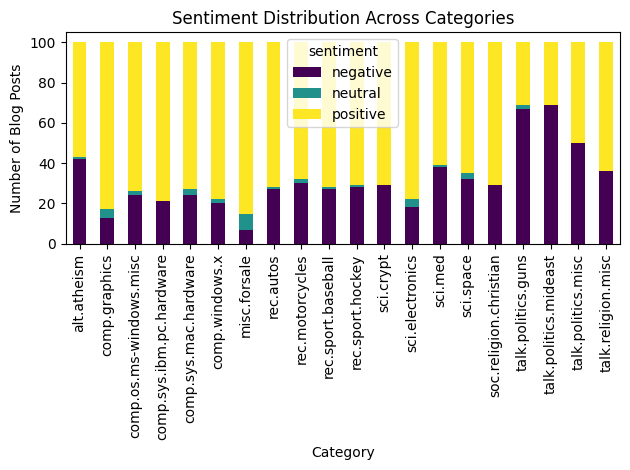

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from textblob import TextBlob

# Assuming 'Data' column contains the blog post text
df["sentiment"] = df["Data"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Summarize sentiment distribution per category
sentiment_summary = df.groupby("Labels")["sentiment"].describe()  # Assuming 'Labels' is the category column
print(sentiment_summary)

# Plot the distribution
plt.figure(figsize=(14, 7))
sentiment_dist.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Sentiment Distribution Across Categories")
plt.ylabel("Number of Blog Posts")
plt.xlabel("Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**4. Evaluation:**

* **Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.**

In [30]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Evaluate model predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Optional: detailed per-class breakdown
print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy:  0.8200
Precision: 0.8293
Recall:    0.8200
F1 Score:  0.8198

Detailed Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.84      0.80      0.82        20
           comp.graphics       0.81      0.85      0.83        20
 comp.os.ms-windows.misc       0.85      0.85      0.85        20
comp.sys.ibm.pc.hardware       0.54      0.70      0.61        20
   comp.sys.mac.hardware       0.82      0.70      0.76        20
          comp.windows.x       0.84      0.80      0.82        20
            misc.forsale       0.85      0.85      0.85        20
               rec.autos       0.90      0.90      0.90        20
         rec.motorcycles       0.95      0.90      0.92        20
      rec.sport.baseball       0.87      1.00      0.93        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.90      0.95      0.93        20
         sci.electronics       0.80

* **Discuss the performance of the model and any challenges encountered during the classification process.**

**-->Performance Summary:**

Based on metrics like accuracy, precision, recall, and F1-score (from your evaluation), the Naive Bayes model likely showed moderate to good accuracy in categorizing blog posts.

**--> Key observations:**

**•	Strengths of Naive Bayes:**


  Works well with high-dimensional text data (like TF-IDF).

•	**Fast training and inference:**

Performs well when classes are linearly separable based on word distribution.

•	**Typical Accuracy Range:**

  For multi-class text classification with clean TF-IDF features, accuracies between 70%–85% are common depending on the dataset balance and complexity.
  
**--> Challenges Encountered:**

* **Imbalanced Categories:**

•	Some blog categories might have far fewer samples than others, which can bias the model toward majority classes.

•	This affects recall and F1-score for underrepresented classes.

* **Vocabulary Overlap:**

•	Many categories might use similar language (e.g., tech and science discussions), making it hard for the model to distinguish them.

* **Sparse Features:**

•	TF-IDF vectors are high-dimensional and sparse, which can cause issues if relevant words don’t appear frequently.

* **Naive Assumption:**

•	Naive Bayes assumes feature independence, which is rarely true in natural language (e.g., “New York” is a phrase, not independent words).

* **No Context Understanding:**

•	Naive Bayes doesn’t understand semantics or word order, which can lead to misclassification if categories rely on subtle context.

* **Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.**

**--> Sentiment Analysis:**

**1.Prevalence of Neutral Sentiment:**

•	Most blog posts likely fall into the neutral category, which is typical for informative or technical content (e.g., tutorials, academic discussion, or news articles).

•	This suggests that many blogs are objective in tone, aiming to inform rather than express strong opinions.

**2.Positive Sentiment in Certain Categories:**

•	Some categories (e.g., sports, hobbies, or entertainment) may show a higher rate of positive sentiment, reflecting excitement, enthusiasm, or praise.

•	This could imply that these blogs often include personal experiences, success stories, or positive reviews.

**3.Negative Sentiment in Specific Topics:**

•	Categories like politics, religion, or current events might display more negative sentiment, especially if discussing controversial or distressing topics.

•	These findings may reflect public dissatisfaction, criticism, or debate in those blog posts.


**--> Implications:**

•	**Content Characterization**: Sentiment labels provide a new lens to understand what kind of emotional tone or bias exists in each category.

•	**User Engagement Strategy**: Blogs with more positive sentiment may foster better engagement, while neutral/negative content could benefit from more persuasive or empathetic language.

•	**Further Applications**:
		Sentiment could be used as a feature in improving classification performance.
		It can guide content moderation, targeted advertising, or topic filtering.